# Which pre-existing health condition will increase the likelihood of heart disease?
Conclusion: Based of our dataset, we have found that 36.4% of people who have suffered a stroke will also have heart disease. Followed closely by kidney disease at 29.3%. 

In [1]:
#Dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [28]:
heart_df_to_load = Path("Resources/heart_2020_cleaned.csv")
heart_df = pd.read_csv(heart_df_to_load)
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
all = heart_df[["HeartDisease","Stroke","Diabetic","Asthma","KidneyDisease","SkinCancer"]]
x = all[(all.iloc[:,:]=="Yes").all(axis=1)]
print(x)

       HeartDisease Stroke Diabetic Asthma KidneyDisease SkinCancer
1148            Yes    Yes      Yes    Yes           Yes        Yes
12164           Yes    Yes      Yes    Yes           Yes        Yes
14533           Yes    Yes      Yes    Yes           Yes        Yes
16371           Yes    Yes      Yes    Yes           Yes        Yes
26397           Yes    Yes      Yes    Yes           Yes        Yes
32309           Yes    Yes      Yes    Yes           Yes        Yes
40848           Yes    Yes      Yes    Yes           Yes        Yes
47669           Yes    Yes      Yes    Yes           Yes        Yes
54353           Yes    Yes      Yes    Yes           Yes        Yes
56400           Yes    Yes      Yes    Yes           Yes        Yes
69979           Yes    Yes      Yes    Yes           Yes        Yes
101773          Yes    Yes      Yes    Yes           Yes        Yes
101993          Yes    Yes      Yes    Yes           Yes        Yes
105670          Yes    Yes      Yes    Yes      

In [4]:
y = all[(all.iloc[:,:]=="No").all(axis=1)]
print(y)

       HeartDisease Stroke Diabetic Asthma KidneyDisease SkinCancer
4                No     No       No     No            No         No
9                No     No       No     No            No         No
11               No     No       No     No            No         No
13               No     No       No     No            No         No
14               No     No       No     No            No         No
...             ...    ...      ...    ...           ...        ...
319788           No     No       No     No            No         No
319789           No     No       No     No            No         No
319792           No     No       No     No            No         No
319793           No     No       No     No            No         No
319794           No     No       No     No            No         No

[195506 rows x 6 columns]


In [5]:
print((len(x))/len(heart_df))

9.693710032989885e-05


In [6]:
print((len(y))/len(heart_df))

0.611347894745071


#### Conclusion: 0.00009% of our population answered yes for having heart disease, stroke, diabetic, asthma, kidney disease, and skin cancer. 61% of our population have no pre-existing conditions. 

In [7]:
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Data Table for Heart Disease & Stroke


In [8]:
#Keep the columns with data for Heart Disease and Stroke
# https://www.statology.org/pandas-keep-columns/
stroke_heart = heart_df[["HeartDisease","Stroke"]]

stroke_heart.head()

,HeartDisease,Stroke
0,No,No
1,No,Yes
2,No,No
3,No,No
4,No,No


## Charts for Heart Disease & Stroke


In [9]:
no_stroke_df = heart_df.loc[heart_df["Stroke"]=="No"]
pct_heart_disease_no_stroke = len(no_stroke_df.loc[no_stroke_df["HeartDisease"]=="Yes"])/len(no_stroke_df)
pct_heart_disease_no_stroke

0.07468982146454964

In [10]:
yes_stroke_df = heart_df.loc[heart_df["Stroke"]=="Yes"]
pct_heart_disease_yes_stroke = len(yes_stroke_df.loc[yes_stroke_df["HeartDisease"]=="Yes"])/len(yes_stroke_df)
pct_heart_disease_yes_stroke

0.3636589609743972

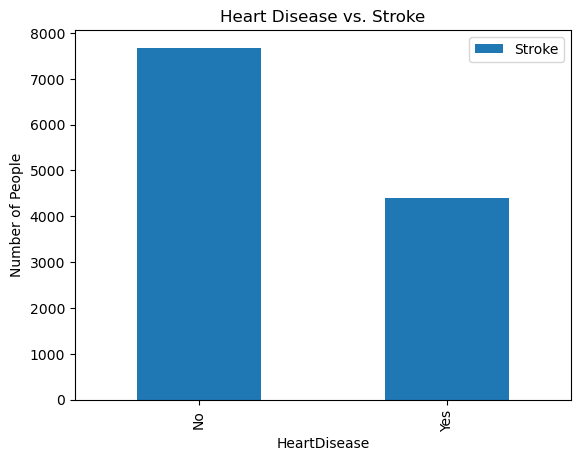

In [11]:
stroke_heart.loc[heart_df["Stroke"]=="Yes"].groupby("HeartDisease").aggregate({"Stroke":"count"}).plot(kind="bar", y="Stroke")
plt.title("Heart Disease vs. Stroke")
plt.ylabel("Number of People")
plt.savefig("output_data/Stroke_Bar.png")

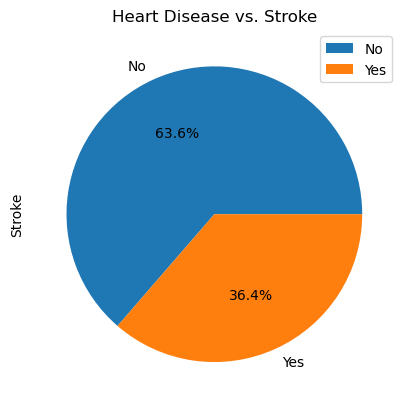

In [12]:
stroke_heart.loc[heart_df["Stroke"]=="Yes"].groupby("HeartDisease").aggregate({"Stroke":"count"}).plot(kind="pie", y="Stroke", autopct="%.1f%%")
plt.title("Heart Disease vs. Stroke")
plt.savefig("output_data/Stroke_Pie.png")

## Data Table for Heart & Kidney Disease


In [13]:
kidney_heart = heart_df[["HeartDisease","KidneyDisease"]]

kidney_heart.head()

,HeartDisease,KidneyDisease
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


## Charts for Heart and Kidney Disease

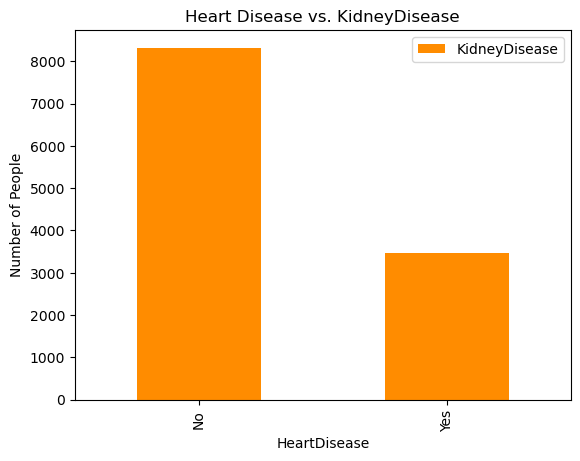

In [14]:
kidney_heart.loc[heart_df["KidneyDisease"]=="Yes"].groupby("HeartDisease").aggregate({"KidneyDisease":"count"}).plot(kind="bar", y="KidneyDisease",color="darkorange")
plt.title("Heart Disease vs. KidneyDisease")
plt.ylabel("Number of People")
plt.savefig("output_data/KidneyDisease_Bar.png")

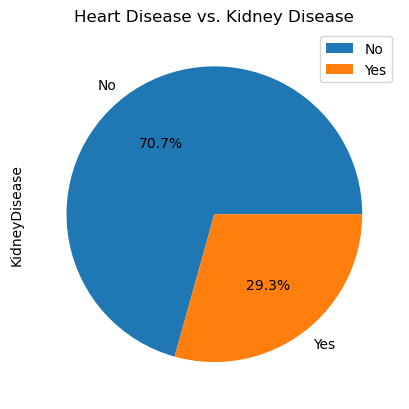

In [15]:
#Visualize the data in a pie chart to show the percentages of our data 
kidney_heart.loc[heart_df["KidneyDisease"]=="Yes"].groupby("HeartDisease").aggregate({"KidneyDisease":"count"}).plot(kind="pie", y="KidneyDisease", autopct="%.1f%%",)
plt.title("Heart Disease vs. Kidney Disease")
plt.savefig("output_data/Kidney_Pie.png")

#### Conclusion: 100% of this population have kidney disease. 29.3% have heart and kidney disease. 70.7% does not have heart disease but does have kidney disease.

## Data Table for Heart Disease & Skin Cancer

In [16]:
skin_heart = heart_df[["HeartDisease","SkinCancer"]]
skin_heart.head()

,HeartDisease,SkinCancer
0,No,Yes
1,No,No
2,No,No
3,No,Yes
4,No,No


## Charts for Heart Disease and Skin Cancer


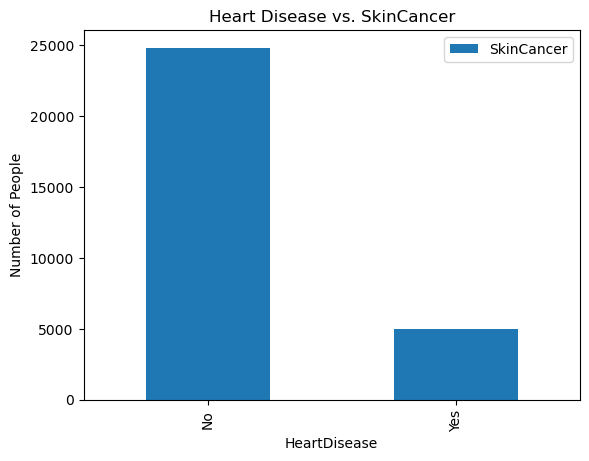

In [17]:
skin_heart.loc[heart_df["SkinCancer"]=="Yes"].groupby("HeartDisease").aggregate({"SkinCancer":"count"}).plot(kind="bar", y="SkinCancer")
plt.title("Heart Disease vs. SkinCancer")
plt.ylabel("Number of People")
plt.savefig("output_data/SkinCancer_Bar.png")

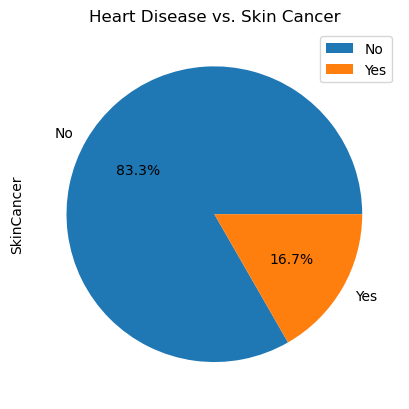

In [18]:
#Visualize the data in a pie chart to show the percentages of our data
skin_heart.loc[heart_df["SkinCancer"]=="Yes"].groupby("HeartDisease").aggregate({"SkinCancer":"count"}).plot(kind="pie", y="SkinCancer", autopct="%.1f%%")
plt.title("Heart Disease vs. Skin Cancer")
plt.savefig("output_data/SkinCancer_Pie.png")

#### Conclusion: 100% of this population have skin cancer. 16.7%  have heart disease and skin cancer. 83.3% does not have heart disease but does have skin cancer.

## Data Table for Heart Disease & Diabetes

In [19]:
diab_heart = heart_df[["HeartDisease","Diabetic"]]
diab_heart.head()

,HeartDisease,Diabetic
0,No,Yes
1,No,No
2,No,Yes
3,No,No
4,No,No


## Charts for Heart Disease and Diabetes


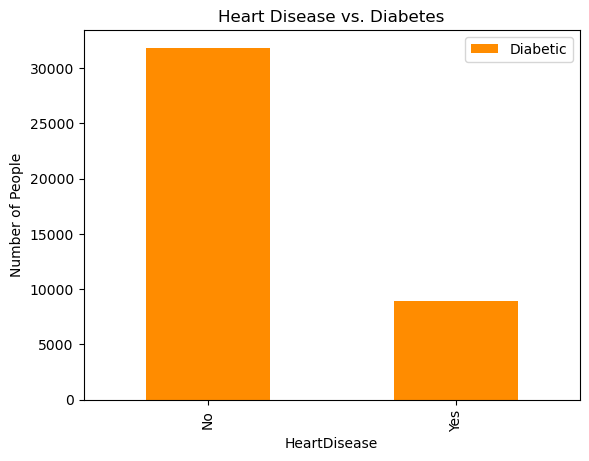

In [20]:
diab_heart.loc[heart_df["Diabetic"]=="Yes"].groupby("HeartDisease").aggregate({"Diabetic":"count"}).plot(kind="bar", y="Diabetic",color="darkorange")
plt.title("Heart Disease vs. Diabetes")
plt.ylabel("Number of People")
plt.savefig("output_data/Diabetic_Bar.png")

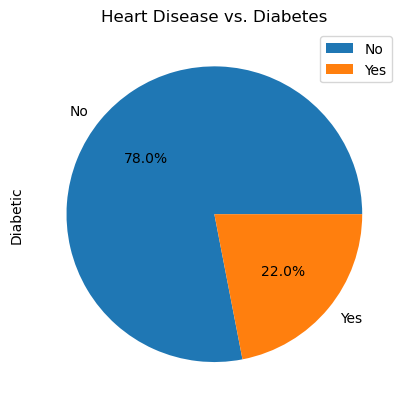

In [21]:
#Visualize the data in a pie chart to show the percentages of our data
diab_heart.loc[heart_df["Diabetic"]=="Yes"].groupby("HeartDisease").aggregate({"Diabetic":"count"}).plot(kind="pie", y="Diabetic", autopct="%.1f%%")
plt.title("Heart Disease vs. Diabetes")
plt.savefig("output_data/Diabetes_Pie.png")

#### Conclusion: 100% of this population have diabetes. 22%  have heart disease and diabetes. 78% does not have heart disease but does have diabetes.

## Data Table for Heart Disease & Asthma

In [22]:
asthma_heart = heart_df[["HeartDisease","Asthma"]]
asthma_heart.head()

,HeartDisease,Asthma
0,No,Yes
1,No,No
2,No,Yes
3,No,No
4,No,No


## Chart for Heart Disease and Asthma


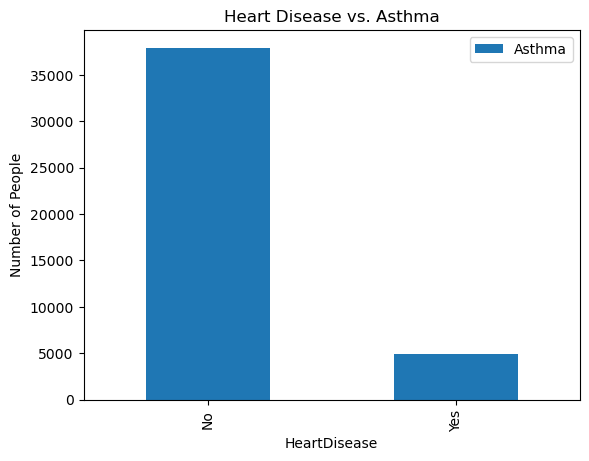

In [23]:
asthma_heart.loc[heart_df["Asthma"]=="Yes"].groupby("HeartDisease").aggregate({"Asthma":"count"}).plot(kind="bar", y="Asthma")
plt.title("Heart Disease vs. Asthma")
plt.ylabel("Number of People")
plt.savefig("output_data/Asthma_Bar.png")

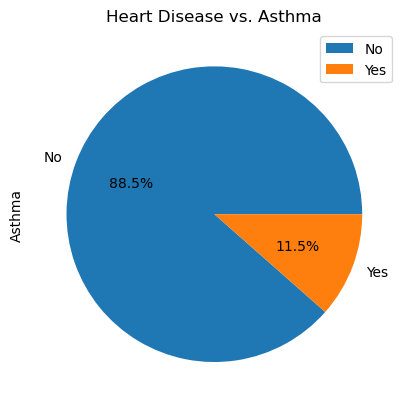

In [24]:
#Visualize the data in a pie chart to show the percentages of our data
asthma_heart.loc[heart_df["Asthma"]=="Yes"].groupby("HeartDisease").aggregate({"Asthma":"count"}).plot(kind="pie", y="Asthma", autopct="%.1f%%")
plt.title("Heart Disease vs. Asthma")
plt.savefig("output_data/Asthma_Pie.png")

#### Conclusion: 100% of this population have asthma. 11.5%  have heart disease and asthma. 88.5% does not have heart disease but does have asthma.

In [ ]:
all[(all.iloc[:,:]=="No").all(axis=1)]